In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss,accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
cancer=pd.read_csv('BreastCancer.csv')
cancer

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,Benign
1,63375,9,1,2,6,4,10,7,7,2,Malignant
2,76389,10,4,7,2,2,8,6,1,1,Malignant
3,95719,6,10,10,10,8,10,7,10,7,Malignant
4,128059,1,1,1,1,2,5,5,1,1,Benign
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,Malignant
695,1371026,5,10,10,10,4,10,5,6,3,Malignant
696,1371920,5,1,1,1,2,1,3,2,1,Benign
697,8233704,4,1,1,1,1,1,2,1,1,Benign


In [3]:
le=LabelEncoder()

In [4]:
cancer['Class']=le.fit_transform(cancer['Class'])
cancer

,Code,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
0,61634,5,4,3,1,2,2,2,3,1,0
1,63375,9,1,2,6,4,10,7,7,2,1
2,76389,10,4,7,2,2,8,6,1,1,1
3,95719,6,10,10,10,8,10,7,10,7,1
4,128059,1,1,1,1,2,5,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,1369821,10,10,10,10,5,10,10,10,7,1
695,1371026,5,10,10,10,4,10,5,6,3,1
696,1371920,5,1,1,1,2,1,3,2,1,0
697,8233704,4,1,1,1,1,1,2,1,1,0


In [5]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [6]:
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [7]:
dtc=DecisionTreeClassifier(random_state=23)

In [8]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [9]:
params={'max_depth':[2,3,4,5,6,None],'min_samples_leaf':[1,3,5,7,10,15],'min_samples_split': [2,5,10]}

In [10]:
gcv=GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='neg_log_loss')

In [11]:
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 3, 5, 7, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_log_loss')

In [12]:
gcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [13]:
gcv.best_score_

-0.2456110095055712

In [14]:
best_model=gcv.best_estimator_
best_model

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=23)

In [15]:
df_imp=pd.DataFrame({'variable':best_model.feature_names_in_ ,'importance':best_model.feature_importances_})
df_imp

,variable,importance
0,Code,0.000000
1,Clump,0.000000
2,UniCell_Size,0.886462
3,Uni_CellShape,0.079546
4,MargAdh,0.000000
5,SEpith,0.000000
6,BareN,0.000000
7,BChromatin,0.033991
8,NoemN,0.000000
9,Mitoses,0.000000


In [16]:
df_imp=df_imp[df_imp['importance']>0.0001]
df_imp=df_imp.sort_values(by="importance")
df_imp

,variable,importance
7,BChromatin,0.033991
3,Uni_CellShape,0.079546
2,UniCell_Size,0.886462


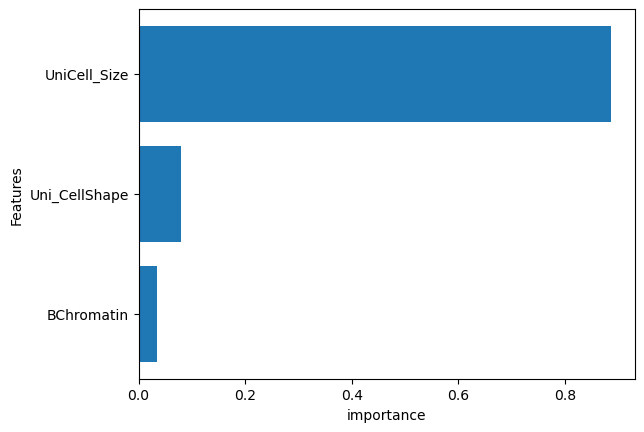

In [17]:
plt.barh(df_imp['variable'],df_imp['importance'])
plt.xlabel("importance")
plt.ylabel('Features')
plt.show()

# Try the best solution

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=23,stratify=y)

In [19]:
dtc=DecisionTreeClassifier(random_state=23,max_depth=2,min_samples_leaf=10,min_samples_split=2)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10, random_state=23)

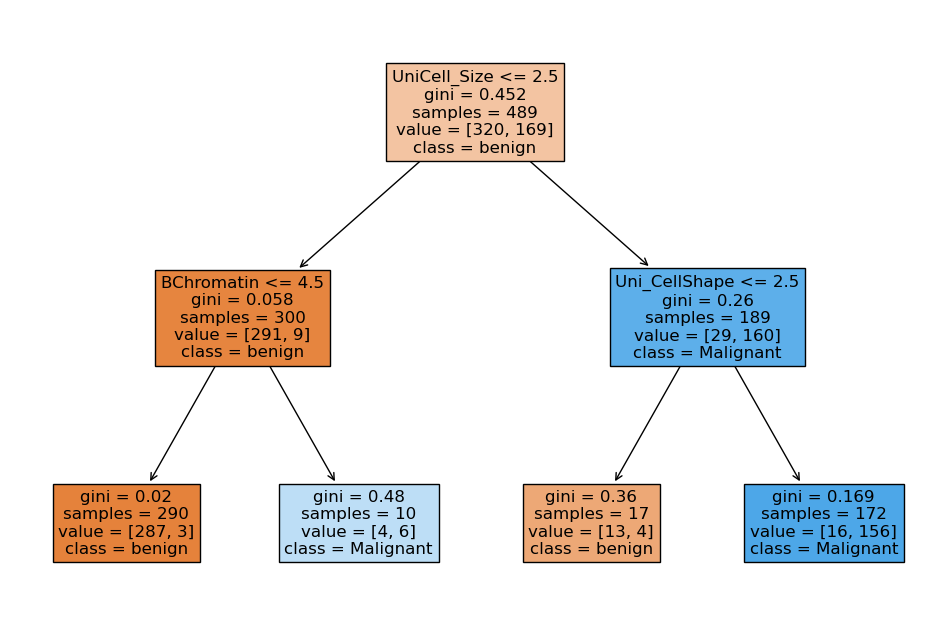

In [20]:
plt.figure(figsize=(12,8))
plot_tree(dtc,feature_names=X_train.columns,class_names=['benign','Malignant'],filled=True,fontsize=12)
plt.show()

In [21]:
y_pred=dtc.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [22]:
y_pred_prob=dtc.predict_proba(X_test)[:,1]
y_pred_prob

array([0.90697674, 0.01034483, 0.01034483, 0.01034483, 0.01034483,
       0.01034483, 0.01034483, 0.01034483, 0.01034483, 0.01034483,
       0.01034483, 0.01034483, 0.01034483, 0.90697674, 0.01034483,
       0.01034483, 0.01034483, 0.90697674, 0.90697674, 0.01034483,
       0.23529412, 0.01034483, 0.23529412, 0.01034483, 0.01034483,
       0.90697674, 0.90697674, 0.90697674, 0.90697674, 0.01034483,
       0.01034483, 0.01034483, 0.01034483, 0.01034483, 0.90697674,
       0.01034483, 0.90697674, 0.01034483, 0.01034483, 0.90697674,
       0.01034483, 0.90697674, 0.01034483, 0.01034483, 0.90697674,
       0.01034483, 0.90697674, 0.90697674, 0.01034483, 0.01034483,
       0.01034483, 0.90697674, 0.01034483, 0.01034483, 0.01034483,
       0.01034483, 0.90697674, 0.90697674, 0.01034483, 0.90697674,
       0.01034483, 0.01034483, 0.90697674, 0.90697674, 0.90697674,
       0.90697674, 0.90697674, 0.01034483, 0.01034483, 0.01034483,
       0.6       , 0.90697674, 0.90697674, 0.01034483, 0.01034

In [23]:
log_loss(y_test,y_pred_prob)

0.1655568389012183

In [24]:
accuracy_score(y_test,y_pred)

0.9476190476190476